# Growing Neural Gas 

A classical neural network that learns the topologies in data and creates a graph based on the topologies. 

Uses the FeatureGraph (see the repo) for the generic graph features. Clone the FeatureGraph .py files to FeatureGraph subfolder.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import datasets

from GrowingNeuralGas import GrowingNeuralGas
from FeatureGraph.graph import Graph

## Generate dataset

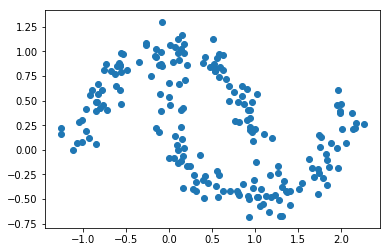

In [3]:
dataset = datasets.make_moons(n_samples=200, noise=.123)[0]
dataset = np.array(dataset)
plt.figure()
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

## Define plotting function for visualizing the graph fitting 

In [4]:
def gng_plotter(dataset : np.ndarray, graph : Graph, iteration : int) -> None: 
        """
        Function to plot the dataset data points and the growing neural gas (GNG) graph. 
        """
        # Get all GNG graph vertex vectors
        vertex_keys = graph.get_vertices()
        vertex_vectors = []
        for key in vertex_keys: 
            vertex_vect = graph.get_vertex_param(key=key, param_key='feature_vector')        
            vertex_vectors.append(vertex_vect)
        vertex_vectors = np.array(vertex_vectors)

        # Get edge end points
        line_points = []
        for key_a in vertex_keys:
            neighbors = graph.get_edges(key_a)['out']
            vect_a = graph.get_vertex_param(key=key_a, param_key='feature_vector') 
            for key_b in neighbors: 
                vect_b = graph.get_vertex_param(key=key_b, param_key='feature_vector') 
                line_points.append([vect_a, vect_b])

        # Setup image
        clear_output(wait=True) # Clear the previous output in jupyter notebook        
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        
        # Plot dataset points
        plt.scatter(dataset[:, 0], dataset[:, 1], c='blue', alpha=0.2, label='Data')
                
        # Plot GNG edges
        for vect_pair in line_points: 
            a_x = vect_pair[0][0]
            a_y = vect_pair[0][1]
            b_x = vect_pair[1][0]
            b_y = vect_pair[1][1]
            plt.plot([a_x, b_x], [a_y, b_y], c='black', alpha=0.5)

        # Plot GNG vertices
        plt.scatter(vertex_vectors[:, 0], vertex_vectors[:, 1], s=50, c='red', alpha=1, label='Nodes')

        plt.title('Iteration ' + str(iteration))        
        plt.legend()
        plt.show()
        

## Create the Growing Neural Gas graph and fit it to the data

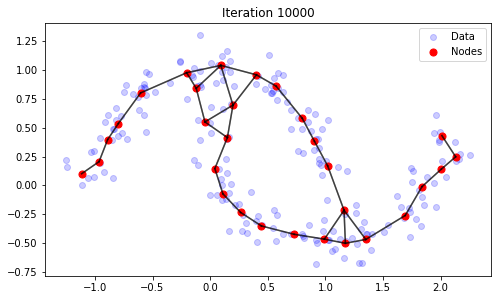

In [8]:
gng = GrowingNeuralGas(feature_dim=2)
gng.fit(dataset=dataset, 
        iterations=10000, 
        winner_upd_coeff=0.02,
        neighbor_upd_coeff=0.0005,
        max_vertex=30, 
        vertex_insert_interval=200,
        vertex_insert_error_scaling=0.5,
        edge_age_limit=100,
        plot_interval=500,
        plot_function=gng_plotter)